# Lung differentiation

The direct lung differentiation dataset from *Hurley, K. et al. 
Cell Stem Cell (2020) doi:10.1016/j.stem.2019.12.009*.

This dataset has multiple time points for the state manifold, but only one time point
for the clonal observation on day 27. 

In [1]:
import cospar as cs
import numpy as np

In [2]:
cs.logging.print_version()
cs.settings.verbosity=2
cs.settings.data_path='lung_data_paper' # A relative path to save data. If not existed before, create a new one.
cs.settings.figure_path='lung_figure_paper' # A relative path to save figures. If not existed before, create a new one.
cs.settings.set_figure_params(format='png',dpi=75,fontsize=14) # use png to reduce file size. 

Running cospar 0.2.0 (python 3.8.12) on 2022-02-07 22:07.


## Load data

In [3]:
adata_orig=cs.datasets.lung()

In [4]:
adata_orig

AnnData object with n_obs × n_vars = 15832 × 26766
    obs: 'time_info', 'state_info'
    uns: 'clonal_time_points', 'data_des', 'state_info_colors'
    obsm: 'X_clone', 'X_emb', 'X_pca'

## Preprocessing (optional)

In [5]:
preprocessing=False
if preprocessing:
    cs.pp.get_highly_variable_genes(adata_orig,normalized_counts_per_cell=10000,min_counts=3, 
        min_cells=3, min_gene_vscore_pctl=80)

    cs.pp.remove_cell_cycle_correlated_genes(adata_orig,corr_threshold=0.03,confirm_change=False) # optional step
    cs.pp.get_X_pca(adata_orig,n_pca_comp=40) 
    #cs.pp.get_X_umap(adata_orig,n_neighbors=20,umap_min_dist=0.3) # we want to keep the original embedding
    #cs.pp.get_state_info(adata_orig,leiden_resolution=0.5) # we want to keep the original state annotation

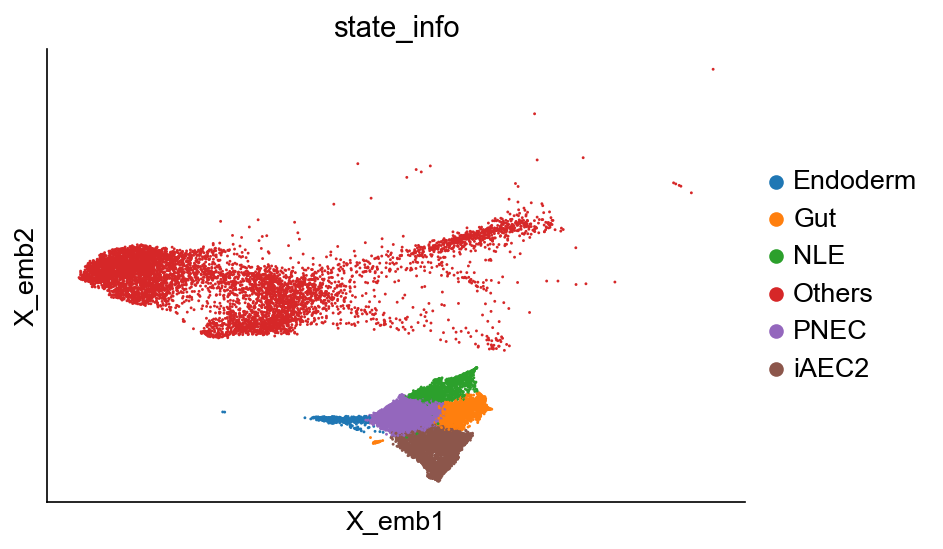

In [6]:
cs.pl.embedding(adata_orig,color='state_info')

In [7]:
cs.hf.check_available_choices(adata_orig)

Available transition maps: []
Available clusters: ['NLE', 'Endoderm', 'PNEC', 'Gut', 'iAEC2', 'Others']
Available time points: ['D27' 'pos_17' 'pos_21']
Clonal time points: ['D27']


### Basic clonal analysis

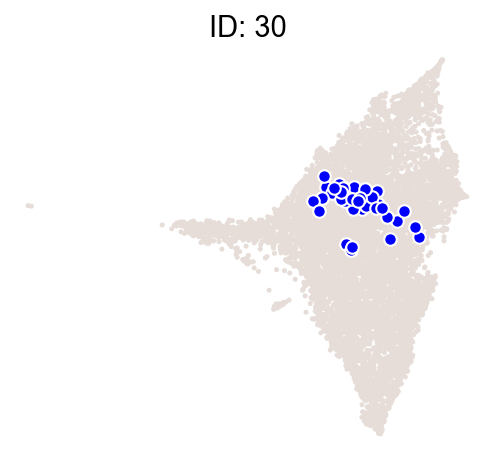

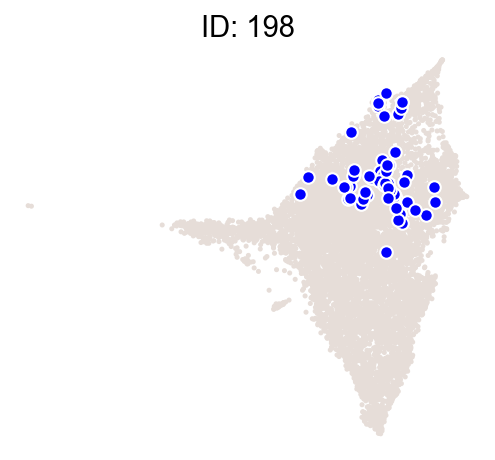

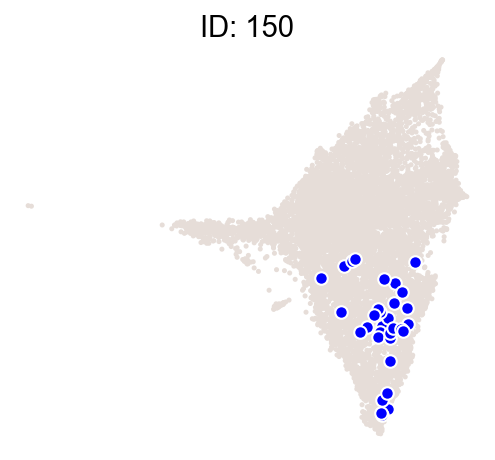

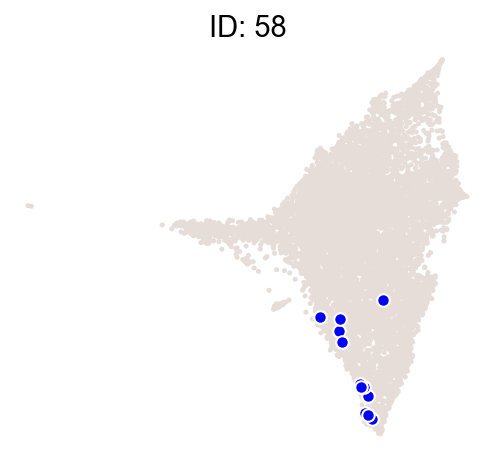

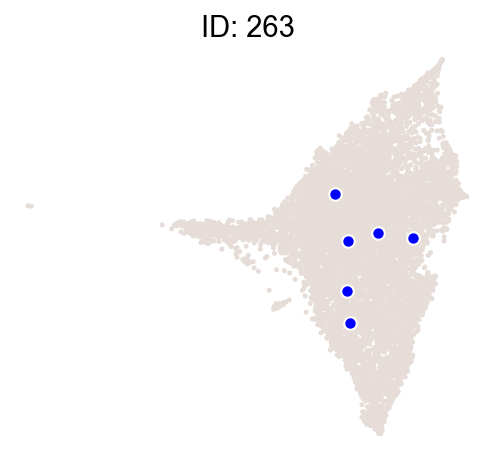

In [8]:
cs.pl.clones_on_manifold(adata_orig,selected_clone_list=[30,198,150,58,263],
            color_list=['blue','red'],selected_times=['D27'])

Results saved as dictionary at adata.uns['fate_coupling_X_clone']


<AxesSubplot:title={'center':'source: X_clone'}>

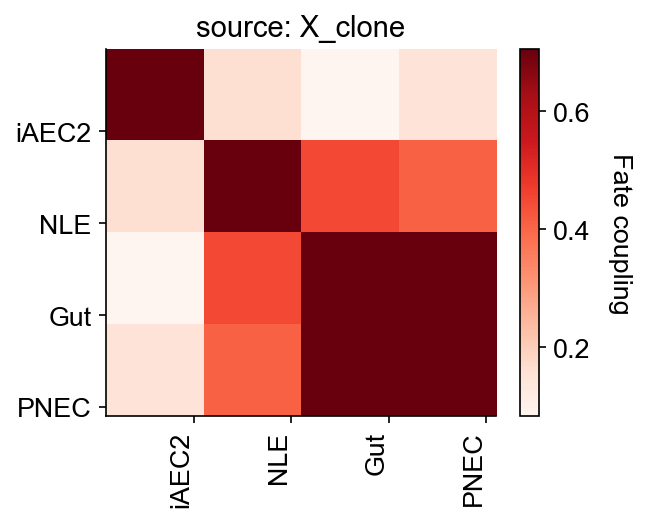

In [9]:
cs.tl.fate_coupling(adata_orig,source='X_clone',selected_fates=['iAEC2', 'PNEC', 'Gut', 'NLE', 'Endoderm']) 
cs.pl.fate_coupling(adata_orig,source='X_clone') 

Data saved at adata.uns['barcode_heatmap']


<AxesSubplot:>

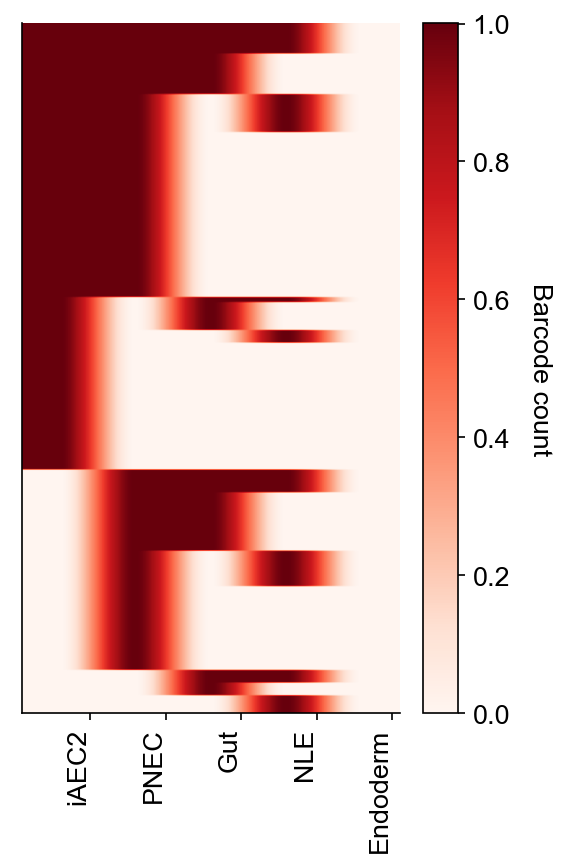

In [10]:
cs.pl.barcode_heatmap(adata_orig,selected_times='D27',
    selected_fates=['iAEC2', 'PNEC','Gut', 'NLE', 'Endoderm'], binarize=True)

100%|██████████| 272/272 [00:00<00:00, 616.34it/s]


Data saved at adata.uns['clonal_fate_bias']


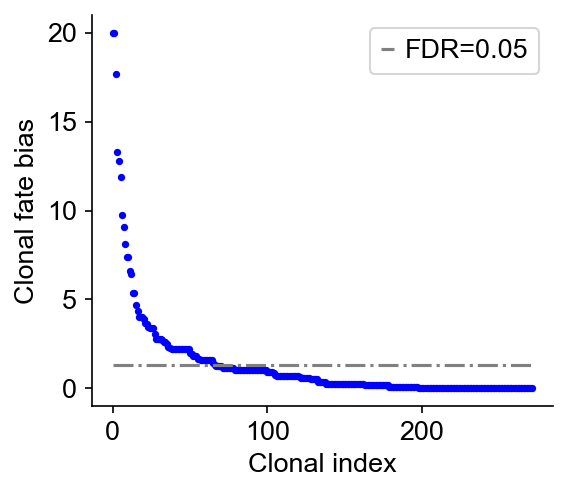

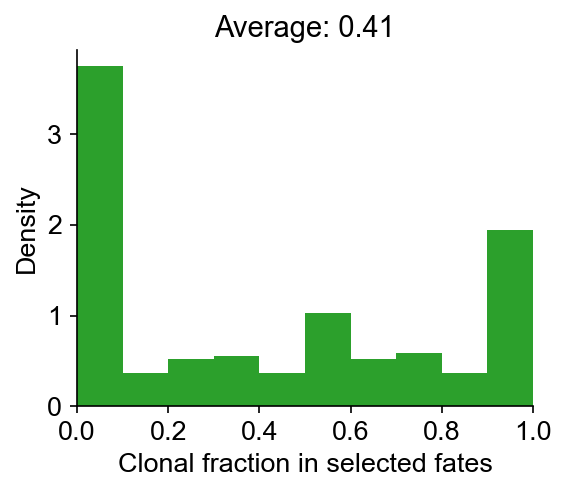

In [11]:
cs.tl.clonal_fate_bias(adata_orig,selected_fate='iAEC2',alternative='two-sided') 
cs.pl.clonal_fate_bias(adata_orig) 

## Infer transition map from end-point clones

It takes around 9 minutes to run it for the first time (the data has ~15000 cells). Later runs take < 3 mins. 

In [12]:
initial_time_points=['pos_17','pos_21']
clonal_time_point='D27'
adata=cs.tmap.infer_Tmap_from_one_time_clones(adata_orig,initial_time_points=['pos_17','pos_21'],
     later_time_point='D27',initialize_method='HighVar',HighVar_gene_pctl=80,max_iter_N=[1,3],
                                smooth_array=[20,15,10],sparsity_threshold=0.2)

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


--------Infer transition map between initial time points and the later time one-------
--------Current initial time point: pos_17--------
Step 0: Pre-processing and sub-sampling cells-------
Step 1: Use the HighVar method for initialization-------
Step a: find the commonly shared highly variable genes------
Highly varable gene number: 3689 (t1); 3729 (t2). Common set: 1075
Step b: convert the shared highly variable genes into clonal info------
Total used genes=863 (no cells left)
Step c: compute the transition map based on clonal info from highly variable genes------
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Convergence (CoSpar, iter_N=3): corr(previous_T, current_T)=0.923
Finishing initialization using HighVar, used time 75.68489861488342
Step 2: Jointly optimize the transition map and the initial clonal states-------
-----JointOpt Iteration 1: Infer initial clonal structure
-----JointOpt Iter

Trying to set attribute `.uns` of view, copying.


--------Current initial time point: pos_21--------
Step 0: Pre-processing and sub-sampling cells-------
Step 1: Use the HighVar method for initialization-------
Step a: find the commonly shared highly variable genes------
Highly varable gene number: 3794 (t1); 3729 (t2). Common set: 1152
Step b: convert the shared highly variable genes into clonal info------
Total used genes=1088 (no cells left)
Step c: compute the transition map based on clonal info from highly variable genes------
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Convergence (CoSpar, iter_N=3): corr(previous_T, current_T)=0.939
Finishing initialization using HighVar, used time 80.7336368560791
Step 2: Jointly optimize the transition map and the initial clonal states-------
-----JointOpt Iteration 1: Infer initial clonal structure
-----JointOpt Iteration 1: Update the transition map by CoSpar
Load pre-computed similarity matrix
Iterat

### Save pre-computed map

In [13]:
save_data=False
if save_data:
    cs.hf.save_map(adata)
    
#adata=cs.hf.read('lung_data_paper/Lung_OneTimeClone_t*pos_17*pos_21*D27_adata_with_transition_map.h5ad')

### Plotting

Results saved at adata.obs['fate_map_transition_map_NLE']
Results saved at adata.obs['fate_map_transition_map_Endoderm']
Results saved at adata.obs['fate_map_transition_map_PNEC']
Results saved at adata.obs['fate_map_transition_map_Gut']
Results saved at adata.obs['fate_map_transition_map_iAEC2']
Results saved at adata.obs['fate_map_transition_map_Others']


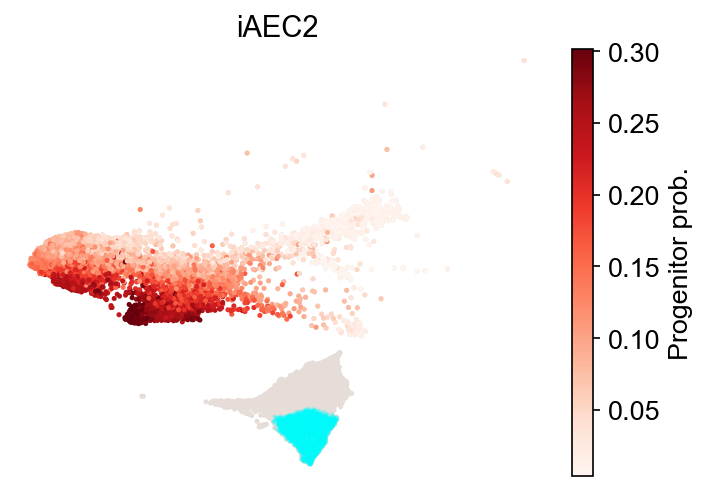

In [14]:
cs.tl.fate_map(adata,
               source='transition_map',map_backward=True)
cs.pl.fate_map(adata,selected_fates=['iAEC2'],source='transition_map',plot_target_state=True)

Results saved at adata.obs['fate_map_transition_map_iAEC2']
Results saved at adata.obs['fate_map_transition_map_PNEC_Gut_NLE_Endoderm']
Results saved at adata.obs['fate_bias_transition_map_iAEC2*PNEC_Gut_NLE_Endoderm']


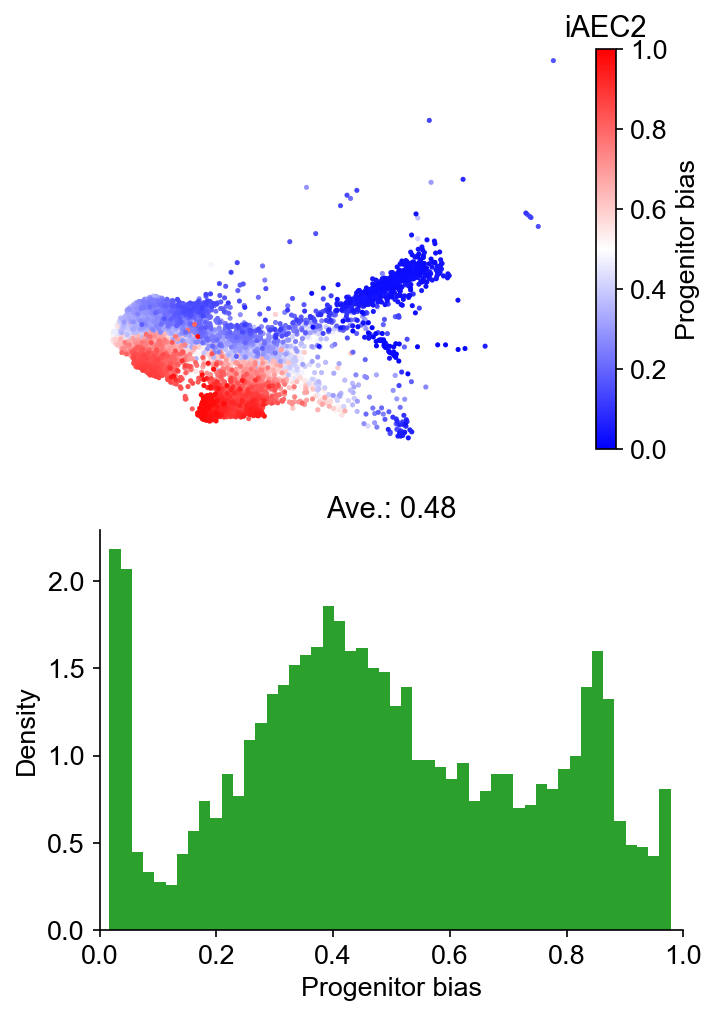

In [15]:
#cs.settings.set_figure_params(figsize=(4,3.5),format='png',fontsize=17)
selected_fates=['iAEC2',['PNEC', 'Gut', 'NLE', 'Endoderm']]
cs.tl.fate_bias(adata,selected_fates,source='transition_map',
        map_backward=True,method='norm-sum')
cs.pl.fate_bias(adata,selected_fates=selected_fates,source='transition_map',plot_target_state=False,background=False,show_histogram=True)

### DGE analysis

Results saved at adata.obs['fate_map_transition_map_iAEC2']
Results saved at adata.obs['fate_map_transition_map_PNEC_Gut_NLE_Endoderm']
Results saved at adata.obs['fate_bias_transition_map_iAEC2*PNEC_Gut_NLE_Endoderm']
Results saved at adata.obs[f'progenitor_transition_map_iAEC2'] and adata.obs[f'diff_trajectory_transition_map_iAEC2']
Results saved at adata.obs[f'progenitor_transition_map_PNEC_Gut_NLE_Endoderm'] and adata.obs[f'diff_trajectory_transition_map_PNEC_Gut_NLE_Endoderm']


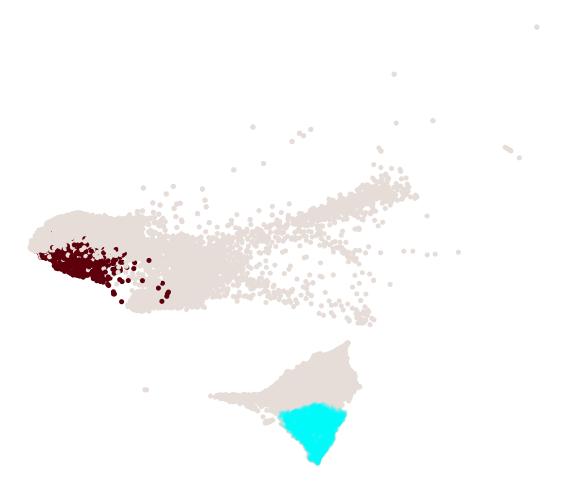

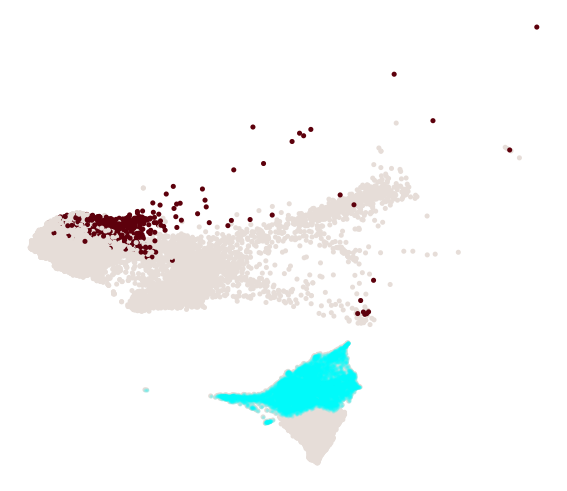

In [16]:
selected_fates=['iAEC2',['PNEC', 'Gut', 'NLE', 'Endoderm']]
cs.tl.progenitor(adata,selected_fates,
            source='transition_map',sum_fate_prob_thresh=0,bias_threshold_A=0.6,bias_threshold_B=0.3)

cs.pl.progenitor(adata,selected_fates,
            source='transition_map',
                            selected_times=['pos_17'])

In [17]:
import numpy as np
cell_group_A=np.array(adata.obs['progenitor_transition_map_iAEC2'])
cell_group_B=np.array(adata.obs['progenitor_transition_map_PNEC_Gut_NLE_Endoderm'])
dge_gene_A, dge_gene_B=cs.tl.differential_genes(adata,cell_group_A=cell_group_A,cell_group_B=cell_group_B,FDR_cutoff=0.05)

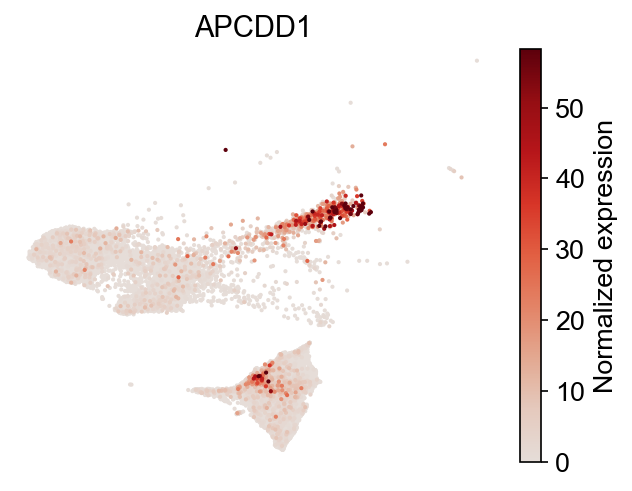

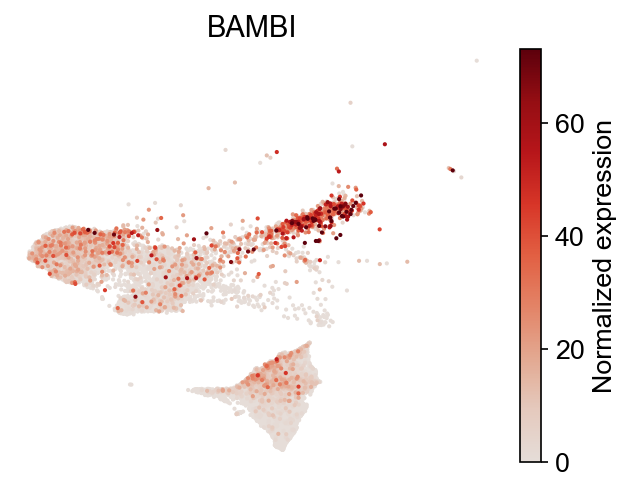

In [18]:
selected_genes=dge_gene_A['gene'][:2]
cs.pl.gene_expression_on_manifold(adata,selected_genes=selected_genes,color_bar=True,savefig=False)

Update cluster annotation

In [19]:
state_info=np.array(adata.obs['state_info']).astype('>U15')

state_info[cell_group_A>0]='iAEC2 prog.'
state_info[cell_group_B>0]='Non-iAEC2 prog.'
adata.obs['state_info']=state_info

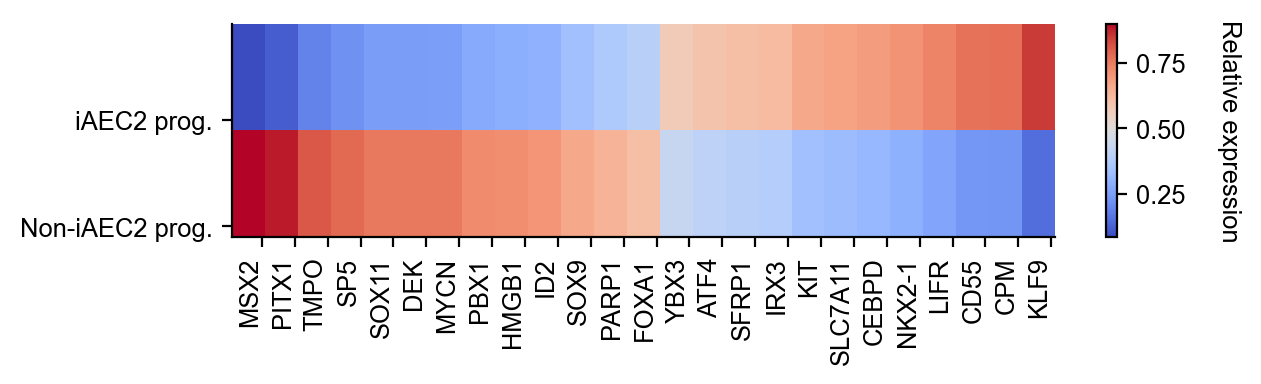

In [20]:
cs.settings.set_figure_params(fontsize=10)
state_info=np.array(adata.obs['state_info'])

gene_list=['KLF9','CEBPD', 'YBX3', 'ATF4', 'NKX2-1','IRX3','SLC7A11', 'LIFR', #'HSPA5',
    'SFRP1',  'CD55', 'KIT', 'CPM', #'LDLR', 'GFRA1',
     'PITX1', 'MSX2', 'MYCN','SOX9', 'SOX11', 'ID2', 'PBX1', 'FOXA1',  'SP5', 'TMPO',
    'DEK', 'HMGB1', 'PARP1']#, 'TFDP1', 'HNRNPD', 'MYBL2']

selected_fates=['iAEC2 prog.','Non-iAEC2 prog.']
renames=['iAEC2 prog.','Non-iAEC2 prog.']

gene_expression_matrix=cs.pl.gene_expression_heat_map(adata,selected_genes=gene_list,
            selected_fates=selected_fates,rename_fates=renames,horizontal=True,fig_width=6.5,fig_height=2)
